<a href="https://colab.research.google.com/github/SeyfGoumeida/Projet_Mixt_Coclus_Partie1/blob/main/Projet_Mixt_Coclus_Partie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install gensim

In [46]:
import pandas as pd
import string
import re
import operator
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
#------------------------------------------------ 
import os
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
import operator
from functools import reduce
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.utils import tokenize
from gensim.models import Word2Vec

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
df = pd.read_csv('/content/classic4.csv',header=0,index_col=0)
df


,text,label
0,Computer-Aided Analysis and Design of Informat...,cacm
1,Milestones in Cataloging In the case of the pr...,cisi
2,childhood psychosis. a description is given of...,med
3,neonatal hepatitis or familial neonatal obstru...,med
4,Handbook of Comparative Librarianship The firs...,cisi
...,...,...
7090,throat and nose surgery in patients with const...,med
7091,Computers and Society: A Proposed Course for C...,cacm
7092,Romberg Integration (Algorithm 60),cacm
7093,Semantic Evaluation from Left to Right This pa...,cacm


In [48]:
df["label"].value_counts().to_frame()

,label
cacm,3204
cisi,1460
cran,1398
med,1033


In [49]:
#punctuations
punctuations = string.punctuation
#stopwords
stop_words = list(STOP_WORDS)
def clean_text(
  string : str,
  ponctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
  stop_words = stop_words)->str : 

  #URLs
  string = re.sub(r"https?://\S+|www\.\S+",'',string)
  #html 
  string = re.sub(r'<.*?>','',string)
  #Numbers
  string = re.sub(r'[0-9]+','',string) 

  #Remove punctuations
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x,"")
  #To lower
  string = string.lower()
  #Remove stop words
  lemmatizer = WordNetLemmatizer()
  string = ' '.join([lemmatizer.lemmatize(word) for word in string.split() if word not in stop_words])
  #Cleaning the whitespaces
  string = re.sub(r'\s', ' ', string).strip()

  return string

In [50]:
abstract = df['text'].to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]

In [51]:
len(abstracts_cleaned)

7095

#Word2Vec

In [52]:
from gensim.utils import tokenize
sentances = [list(tokenize(s, deacc=True, lower=True)) for s in abstracts_cleaned]
len(sentances)

7095

In [53]:
from gensim.models import word2vec
model1 = word2vec.Word2Vec(sentances,min_count=2)
model1.corpus_count
vocab = model1.wv.vocab
words = list(vocab) # les mots

list_vec = list(model1.wv.vectors) # les vecteurs de mots

model1.similarity('worker', 'treated') # calcul de similarité

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


0.68559164

In [54]:
len(list(model1.wv.vocab.keys()))

13643

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

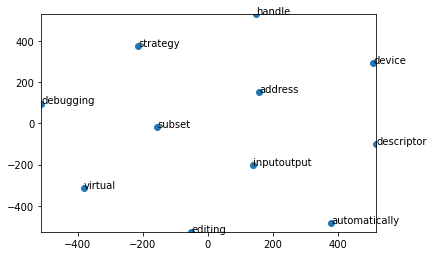

In [55]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word, size):
    
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]
    
  close_words = model.similar_by_word(word)

  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model[wrd_score[0]]
    word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
  tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)
  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)
  for label, x, y in zip(word_labels, x_coords, y_coords):
      plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
  plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
  plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
  plt.show()

display_closestwords_tsnescatterplot(model1, 'address', 100)

In [20]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz

In [57]:
from gensim.models import KeyedVectors

model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentances)
total_examples = model_2.corpus_count
model = KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True)
model_2.intersect_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
model_2.train(sentances, total_examples=total_examples, epochs=model_2.iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(1964040, 2018900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


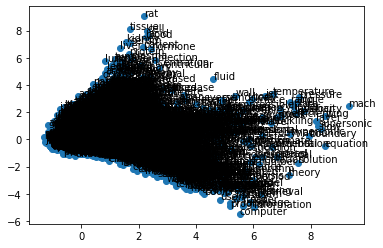

In [72]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = model_2[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [81]:
model1.wv.vectors.shape
result.shape

(13643, 2)

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
#kmeans.fit(result)
kmeans.fit(moyenne_des_vecteur)
#y_kmeans = kmeans.predict(result)
y_kmeans = kmeans.predict(moyenne_des_vecteur)

ValueError: ignored

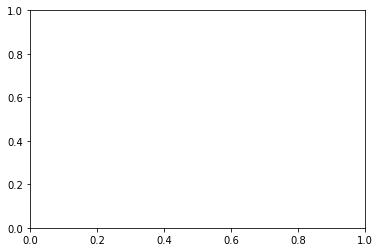

In [123]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.2);

In [119]:
moyenne_des_vecteur = []
for i in range(len(sentances)):
  list_des_vecteurs =[]
  for k in sentances[i]:
    vecteur_de_mot = model_2.wv.word_vec(k)
    list_des_vecteurs.append(vecteur_de_mot)
  moyenne = np.mean(list_des_vecteurs,axis=0)
  moyenne_des_vecteur.append(moyenne)

print(sentances[0])
print(moyenne_des_vecteur[0])


['computeraided', 'analysis', 'design', 'information', 'system', 'paper', 'describes', 'use', 'computeraided', 'analysis', 'design', 'development', 'integrated', 'financial', 'management', 'system', 'navy', 'material', 'command', 'support', 'activity', 'nmcsa', 'computeraided', 'analysis', 'consists', 'set', 'procedure', 'computer', 'program', 'specifically', 'designed', 'aid', 'process', 'application', 'software', 'design', 'computer', 'selection', 'performance', 'evaluation', 'major', 'component', 'problem', 'statement', 'language', 'problem', 'statement', 'analyzer', 'generator', 'alternative', 'design', 'performance', 'evaluator', 'statement', 'requirement', 'written', 'ad', 'accurately', 'defined', 'system', 'analyzed', 'problem', 'statement', 'analyzer', 'ad', 'ad', 'problem', 'definition', 'supplemented', 'additional', 'information', 'order', 'create', 'complete', 'problem', 'definition', 'analyzed', 'problem', 'statement', 'translated', 'form', 'necessary', 'use', 'soda', 'syst

[ 0.00750673 -0.3094347   0.05347384  0.24820757 -0.3496016   0.23607087
  0.5848287  -0.16010733  0.25998536  0.01189462 -0.23059782 -0.28822973
  0.02185154  0.01217724 -0.4266489   0.36639464  0.03271598 -0.08550972
 -0.13891213 -0.6077542  -0.09124703  0.39667156 -0.6473287   0.49617672
  0.10285589 -0.0675602  -0.27174127  0.3455434  -0.18975644 -0.16147517
 -0.09401529 -0.36875808 -0.1201729   0.2052479   0.42441446 -0.05540225
  0.06402314 -0.15428625  0.64503556 -0.30407897  0.21424037  0.3293087
  0.34798175  0.41809857 -0.16641963 -0.532283   -0.46694937  0.10927679
 -0.28583783  0.39014167  0.03755387 -0.18830815 -0.28031468 -0.67562747
 -0.08249923  0.36675376 -0.17875752 -0.71810293  0.35219792 -0.25927833
  0.06258725  0.01274028 -0.5084934  -0.25913396 -0.09692274  0.1497926
 -0.3868348   0.662339   -0.07171974 -0.143261   -0.01132734 -0.22599547
  0.5007564  -0.34834218  0.06297167 -0.18001907  0.6768194   0.27570572
  0.0926274   0.41649342  0.45333633  0.0721345   0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

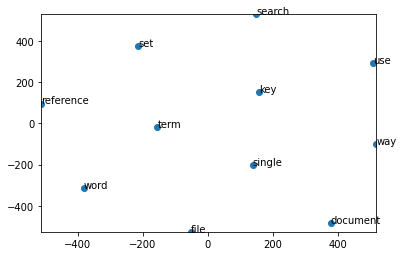

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

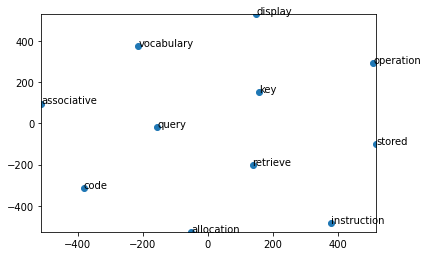

In [44]:
display_closestwords_tsnescatterplot(model_2, 'key', 300)
display_closestwords_tsnescatterplot(model1, 'key', 100)